In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/Anipict/object_detection

/content/drive/MyDrive/Anipict/object_detection


In [4]:
#ultralytics'i indirme.
%pip install ultralytics

import ultralytics
ultralytics.checks()


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/112.6 GB disk)


In [ ]:
!yolo detect train data=data/data.yaml model=yolo11n.pt epochs=100 imgsz=640 workers=8 batch=8 device=0 name=yolov8_anipict_detection2

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_anipict_detection2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

In [ ]:
# yarıda kalmış/kesilmiş eğitimi devam ettirme
!yolo detect train model=runs/detect/yolov8_anipict_detection2/weights/last.pt resume=True

Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/yolov8_anipict_detection2/weights/last.pt, data=data/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_anipict_detection2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/detect/yolov8_anipict_detection2/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

In [ ]:
!yolo detect predict model=runs/detect/yolov8_anipict_detection2/weights/best.pt source=inference save=True

Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 987, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 550, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 236, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.11/dist-packages/to

In [ ]:
%pwd

'/content/drive/MyDrive/Anipict/object_detection'


0: 448x640 1 Ankara keçisi, 48.6ms
Speed: 1.6ms preprocess, 48.6ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


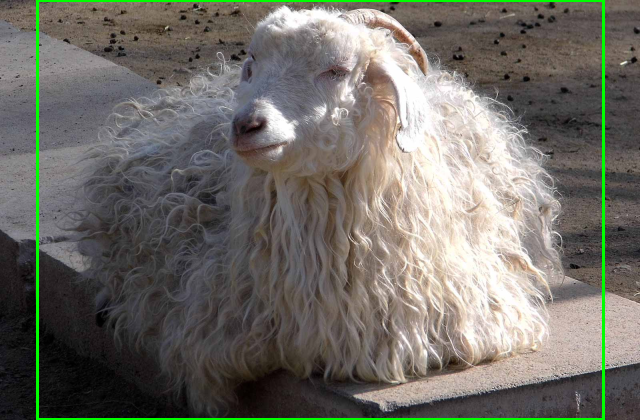

In [6]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font= cv2.FONT_HERSHEY_SIMPLEX

img_path = "deneme-resimler/AnkaraKecisi.jpg"
model_path = "runs/detect/yolov8_anipict_detection2/weights/best.pt"

img = cv2.imread(img_path)
img = imutils.resize(img, width=640)
model = YOLO(model_path)

results = model(img)[0]
#print(results)

threshold = 0.5
for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)

  # print(result)
  if score > threshold:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)

    class_name = results.names[class_id]
    score = score * 100
    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0,255,0), 1, cv2.LINE_AA)

cv2_imshow(img)

# inference içindeki tüm resimleri tara ve çıktıları bastır (for döngüsü ile tarayacağız ve çıktıları alt alta bastıracağız)
# Tüm resimler için bir adres üretmemiz gerekiyor (glob, os) kullanarak bir adresteki tüm dosyaları tarayabiliriz.

